# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o dataset principal

In [2]:
#Importing dataset
df = pd.read_csv("large_sharding.csv")
df.head()

,Name,Method,Dim,N_sample,nList,nprobe,DB Size (GB),Total,Time kNN,Recall@10,Train time,Add time,Move time
0,SK-100M-12d,brute,12.0,100000000.0,0.0,0.0,4.8,31.078460,31.078460,-,NaN,NaN,NaN
1,SK-100M-12d,ivfpq,12.0,100000000.0,65536.0,5.0,4.8,615.768651,232.112546,0.36287,264.986485,101.652754,17.016865
2,SK-100M-12d,ivfpq,12.0,100000000.0,65536.0,10.0,4.8,711.621381,327.965276,0.51524,264.986485,101.652754,17.016865
3,SK-100M-12d,ivfpq,12.0,100000000.0,65536.0,25.0,4.8,857.343159,473.687054,0.70793,264.986485,101.652754,17.016865
4,SK-100M-12d,ivfpq,12.0,100000000.0,65536.0,50.0,4.8,956.109308,572.453204,0.77549,264.986485,101.652754,17.016865


In [3]:
df.dtypes

Name             object
Method           object
Dim             float64
N_sample        float64
nList           float64
nprobe          float64
DB Size (GB)    float64
Total           float64
Time kNN        float64
Recall@10        object
Train time      float64
Add time        float64
Move time       float64
dtype: object

# Separando no dataset para o método bruto

In [4]:
#Getting the brute results
df_brute = df[df['Method'] == 'brute']
df_brute.head()

,Name,Method,Dim,N_sample,nList,nprobe,DB Size (GB),Total,Time kNN,Recall@10,Train time,Add time,Move time
0,SK-100M-12d,brute,12.0,100000000.0,0.0,0.0,4.8,31.078460,31.078460,-,NaN,NaN,NaN
7,SK-200M-12d,brute,12.0,200000000.0,0.0,0.0,9.6,60.321425,60.321425,-,NaN,NaN,NaN
14,SK-300M-12d,brute,12.0,300000000.0,0.0,0.0,14.4,89.841442,89.841442,-,NaN,NaN,NaN
21,SK-400M-12d,brute,12.0,400000000.0,0.0,0.0,19.2,116.782773,116.782773,-,NaN,NaN,NaN


# Plotando Gráficos

In [7]:
df_g = df[df['Method'] != 'brute']

## Training

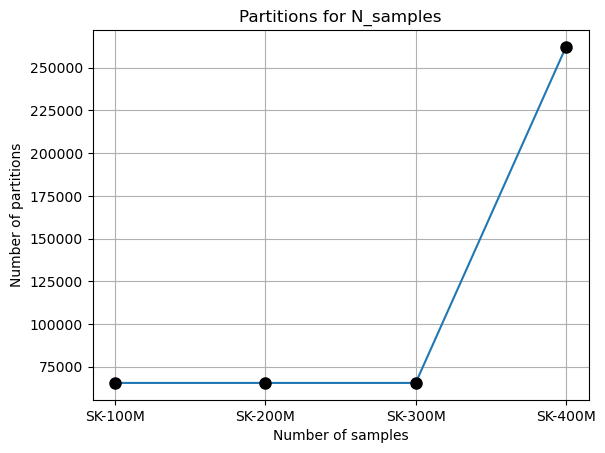

In [9]:
import math
def nlist(n):
    y = int( 2 ** ( 2 * round(math.log(n,10)) ) )
    return y

y = np.vectorize(nlist)
x = [int(1e8),int(2e8),int(3e8),int(4e8)]
plt.plot(x
,y(x),marker='o',markersize=8,markerfacecolor='black',markeredgecolor='black',linestyle='-'
)


x = [int(1e8),int(2e8),int(3e8),int(4e8)]
labels = ['SK-100M', 'SK-200M', 'SK-300M', 'SK-400M']
plt.xticks(x, labels)

plt.xlabel('Number of samples')

plt.ylabel(f"Number of partitions")
plt.title(f'Partitions for N_samples')
plt.grid('on')



plt.show()


In [14]:
def plot_train(df_list,col,method):
    


    
    colors = ['green']
    
    methods = ['ivfpq']
    
    aux = df.drop_duplicates(subset=['Name','Method'],keep='first')
    
    fig = plt.figure(figsize=[7,5])

    
    for index,method in enumerate(methods):
        

        plt.plot(aux[aux['Method'] == method]['N_sample'],aux[aux['Method'] == method]['Train time'],
            label=f"{method.upper()}",marker='o',markersize=8,color=colors[index],markerfacecolor='black',
            markeredgecolor='black',linestyle='-'
        )


    


    
    plt.legend(loc ="lower right")
    plt.title(f'Training time')
    plt.ylabel("Time to train (s)")
    plt.xlabel('N_sample')
    x = [int(1e8),int(2e8),int(3e8),int(4e8)]
    labels = ['SK-100M', 'SK-200M', 'SK-300M', 'SK-400M']
    plt.xticks(x, labels)
    
    plt.grid('on')

    plt.show()


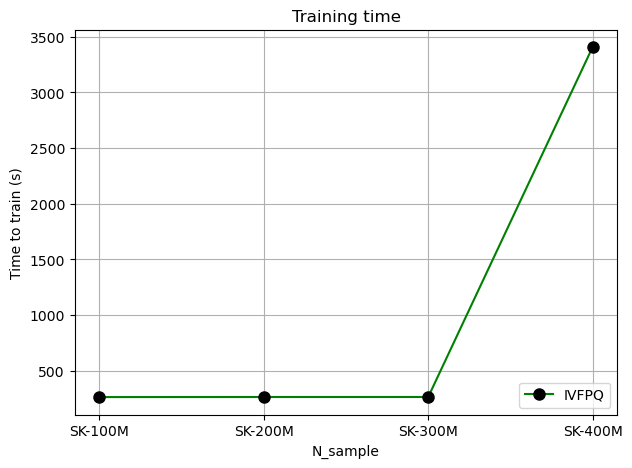

In [15]:
plot_train(df_g,'-','-')

## Função para plotar gráfico do dataframe

In [16]:
def plot_2df(df,db,col):
    
    try:
        df = df.astype({"Time kNN": float, "Recall@10": float})
    except:
        pass
    colors = ['green']

    methods = ['ivfpq']
    
    fig = plt.figure(figsize=[7,5])

    
    
    for index,method in enumerate(methods):
        nprobes = df[(df['Method'] == method) & (df['Name'] == db)]['nprobe'].unique()
        
        plt.plot(nprobes,df[(df['Method'] == method) & (df['Name'] == db)][col],
            label=method.upper(),marker='o',markersize=8,color=colors[index],markerfacecolor='black',
            markeredgecolor='black',linestyle='-'
        )


    



    plt.legend(loc ="lower right")

    x = [5,10,25,50,75,100]
    labels = x
    plt.xticks(x, labels)
    
    plt.xlabel('Nprobes')
    string = ''
    if col != 'Recall@10':
        string = ' (s)'
    plt.ylabel(f"{col}{string}")
    plt.title(f'{db}')
    plt.grid('on')
    


    plt.show()


## Gráfico do Brute

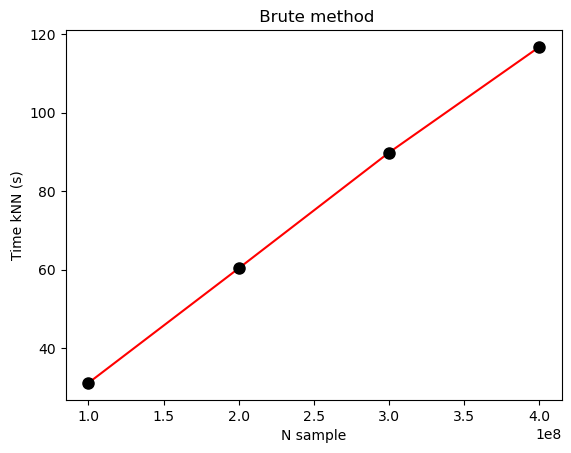

In [17]:
def plot_brute(df):
    df = df.astype({"Time kNN": float,"N_sample": int})
    plt.plot(df['N_sample'],df['Time kNN']
        ,marker='o',markersize=8,color='red',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
    )
    
    plt.title(f' Brute method')
    plt.ylabel('Time kNN (s)')
    plt.xlabel('N sample')
    
    
    
plot_brute(df_brute)

## Gráficos

### 100 Million

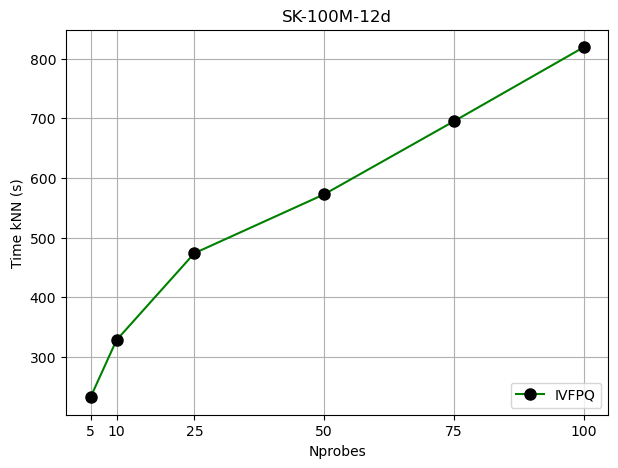

In [19]:
plot_2df(df_g,'SK-100M-12d','Time kNN')

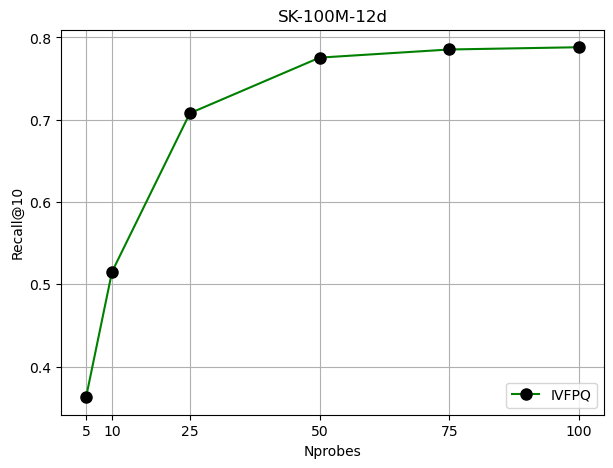

In [20]:
plot_2df(df_g,'SK-100M-12d','Recall@10')

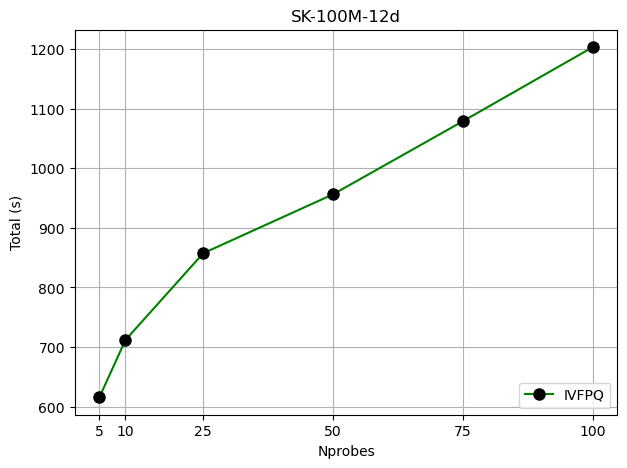

In [21]:
plot_2df(df_g,'SK-100M-12d','Total')

### 200 MILLION

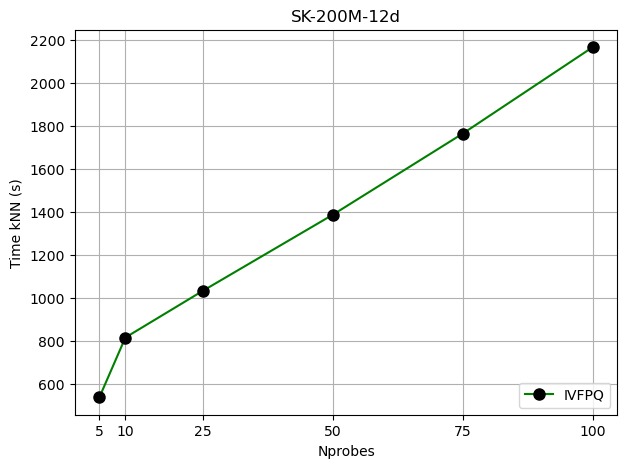

In [22]:
plot_2df(df_g,'SK-200M-12d','Time kNN')

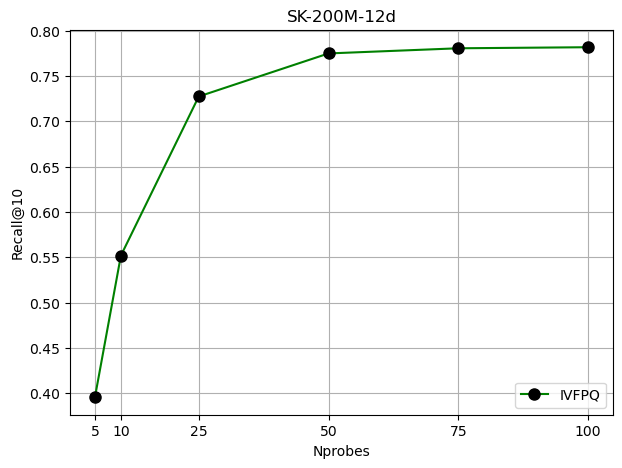

In [23]:
plot_2df(df_g,'SK-200M-12d','Recall@10')

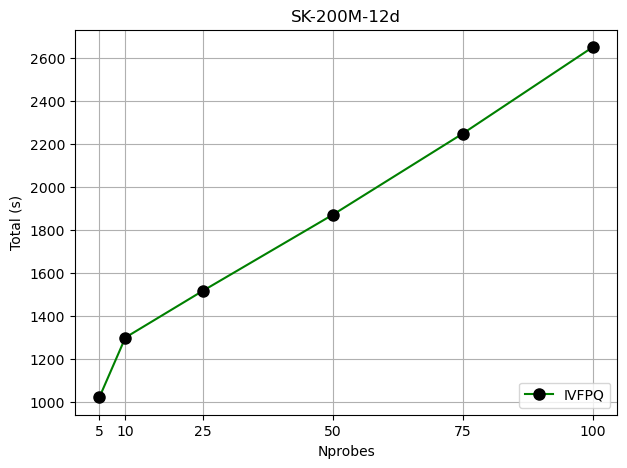

In [24]:
plot_2df(df_g,'SK-200M-12d','Total')

### 300 MILLION

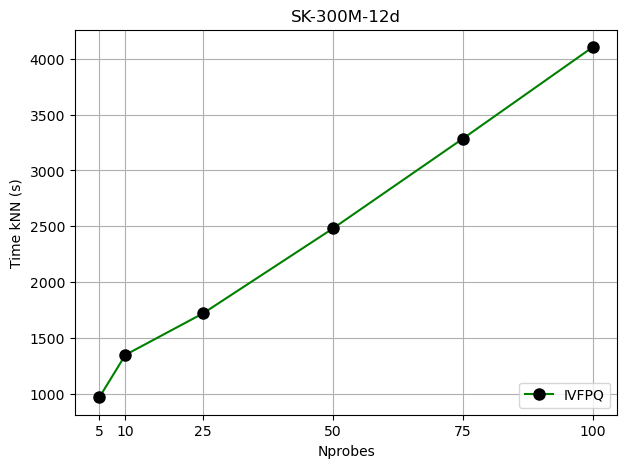

In [25]:
plot_2df(df_g,'SK-300M-12d','Time kNN')

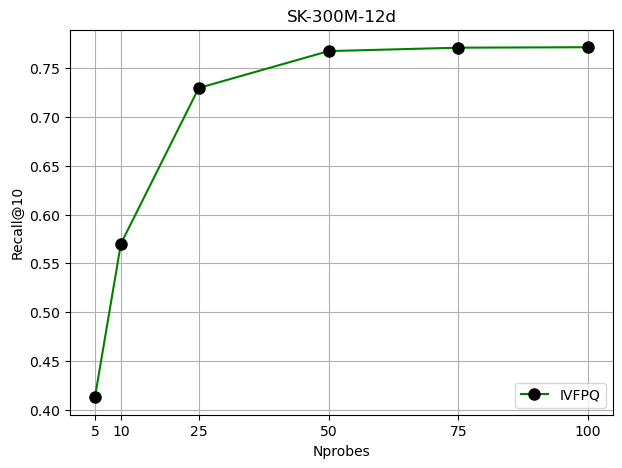

In [26]:
plot_2df(df_g,'SK-300M-12d','Recall@10')

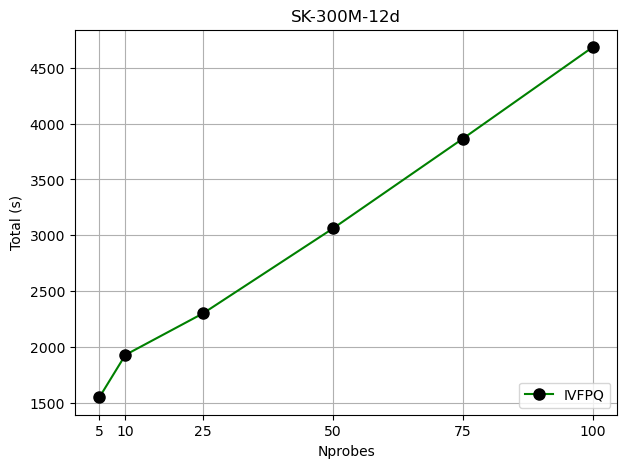

In [27]:
plot_2df(df_g,'SK-300M-12d','Total')

### 400 MILLION

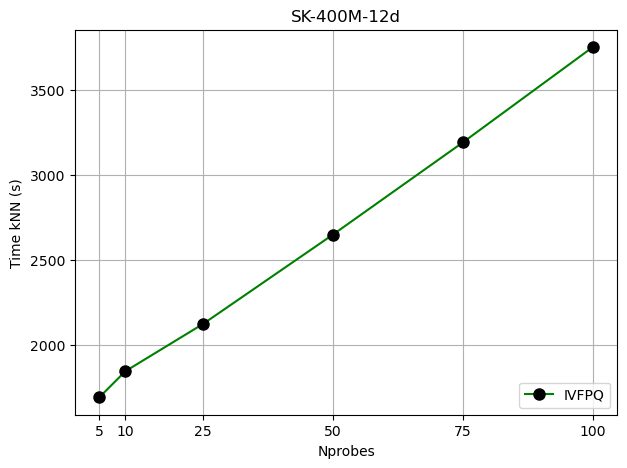

In [28]:
plot_2df(df_g,'SK-400M-12d','Time kNN')

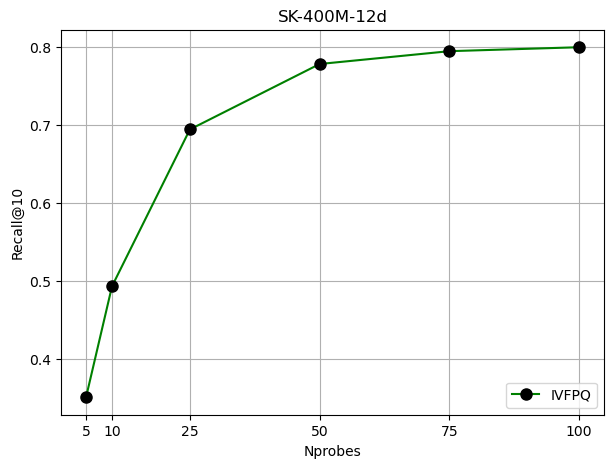

In [29]:
plot_2df(df_g,'SK-400M-12d','Recall@10')

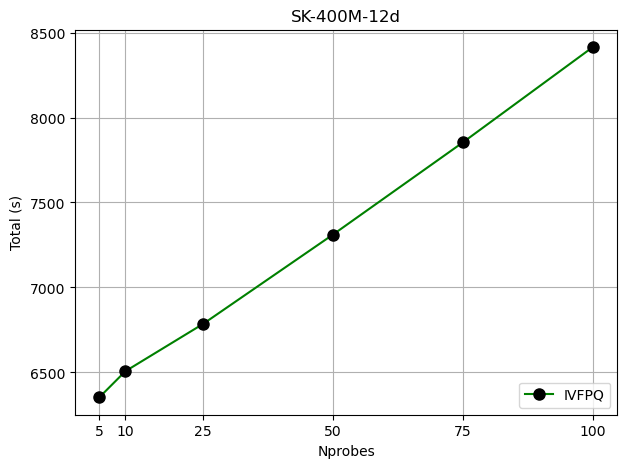

In [30]:
plot_2df(df_g,'SK-400M-12d','Total')